In [1]:
import smtf_utility as util
from pinn_magnetic import MultiDipoleModel



TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30)
sim.add_dipole(0.31,0,0,.1,2,0)
sim.add_dipole(0,-0.11,0,0,2,1)
sim.add_dipole(0,0,0.13,1,0,3)
sim.add_dipole(0,0,-0.25,1,.75,3)

positions, values = sim.get_data()

positions, values = util.shuffle_data(positions, values)

In [3]:
mdmodels = []

# Each model will have same number of poles as index
maxmodels = 7
maxepochs = 30

for i in range(maxmodels):
    mdmodels.append(MultiDipoleModel(poles=pow(2, i), lrate=1000))


In [4]:
# train the models on a smaller number of epochs
for i in range(maxmodels):
    print("----- Model ", i, " -----")
    mdmodels[i].fit(positions, values, epochs=maxepochs)

----- Model  0  -----
epoch  0 --- Loss --- 0.000101775375
epoch  1 --- Loss --- 7.284448e-05
epoch  2 --- Loss --- 5.3975604e-05
epoch  3 --- Loss --- 4.1439696e-05
epoch  4 --- Loss --- 3.293667e-05
epoch  5 --- Loss --- 2.7038817e-05
epoch  6 --- Loss --- 2.2852702e-05
epoch  7 --- Loss --- 1.9813426e-05
epoch  8 --- Loss --- 1.7559229e-05
epoch  9 --- Loss --- 1.585483e-05
epoch  10 --- Loss --- 1.4544434e-05
epoch  11 --- Loss --- 1.3522715e-05
epoch  12 --- Loss --- 1.271691e-05
epoch  13 --- Loss --- 1.2075569e-05
epoch  14 --- Loss --- 1.1561469e-05
epoch  15 --- Loss --- 1.1147078e-05
epoch  16 --- Loss --- 1.0811655e-05
epoch  17 --- Loss --- 1.0539283e-05
epoch  18 --- Loss --- 1.031759e-05
epoch  19 --- Loss --- 1.0136818e-05
epoch  20 --- Loss --- 9.989219e-06
epoch  21 --- Loss --- 9.8685905e-06
epoch  22 --- Loss --- 9.769933e-06
epoch  23 --- Loss --- 9.6891945e-06
epoch  24 --- Loss --- 9.623095e-06
epoch  25 --- Loss --- 9.56897e-06
epoch  26 --- Loss --- 9.524641e-06

In [5]:
# find the model with the smallest fit error
for i in range(maxmodels):
    print("Dipoles", pow(2,i), "Loss: ", mdmodels[i].loss_history[-1])

Dipoles 1 Loss:  9.434183e-06
Dipoles 2 Loss:  9.4882e-06
Dipoles 4 Loss:  9.805746e-06
Dipoles 8 Loss:  1.0378171e-05
Dipoles 16 Loss:  1.1244082e-05
Dipoles 32 Loss:  1.28732145e-05
Dipoles 64 Loss:  2.2976697e-05


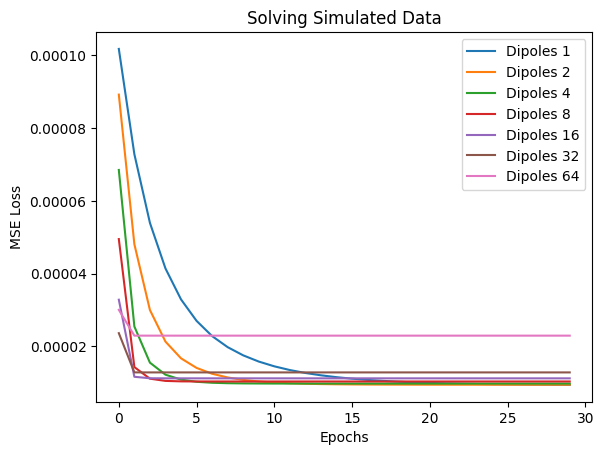

In [6]:
import matplotlib.pyplot as plt

x = range(maxepochs)

# plot lines 
for i in range(maxmodels):    
    plt.plot(x, mdmodels[i].loss_history, label = "Dipoles " + str(pow(2,i))) 

plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title('Solving Simulated Data')
plt.legend() 
plt.show()